In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb 
from IPython.display import display

dir = '/Users/devpatelio/Downloads/Coding/Computational_Biology/mRNA-Fold/foldingoptimizer/data'
meta = {
    'degredation2': 'pH10',
    'degredation2': '50C'
}

##First order of business, explore and visualize data, look into labels, format into pandas
data = pd.read_json('data/train.json', lines=True)

(68, 1)


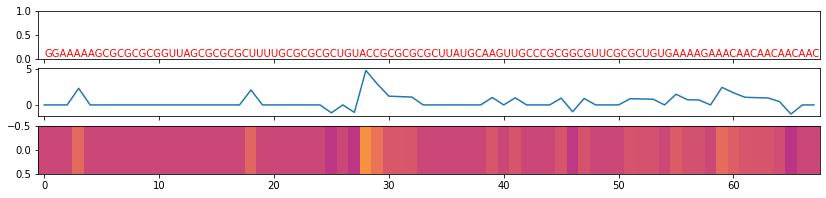

(68, 1)


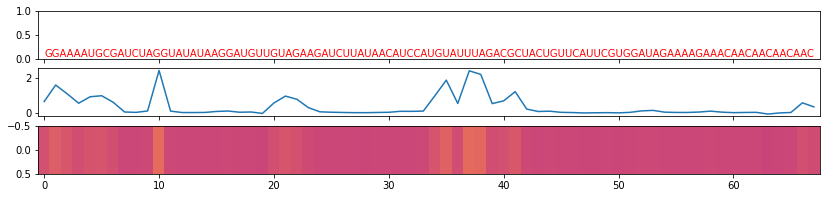

In [4]:
# data = data.drop('index', axis=1)
data.head()

def reactivity_alignment(dataset, index, seq_length = data['seq_length'].iloc[1], added_vars=None):
    fig, (ax, ax2, ax3) = plt.subplots(figsize = (14, 3), nrows=3, sharex=True, )
    reactivity = np.array(dataset['reactivity'].iloc[index])
    reactivity.shape = (reactivity.shape[0], 1)
    print(reactivity.shape)
    ax3.imshow(reactivity.T, cmap='plasma', aspect='auto', vmin=-10, vmax=10)
    ax2.plot(reactivity)
    
    ax.text(0, 0, str(dataset['sequence'].iloc[index]), verticalalignment='bottom', horizontalalignment='left', color='red', fontsize='medium', fontstretch='ultra-expanded')
    plt.plot()
    plt.show()

reactivity_alignment(data, 1)
reactivity_alignment(data, 10)

In [5]:
#Preprocessing data
train = pd.DataFrame(data)
train.query('SN_filter == 1', inplace=True)
train.head()

#we can keep no folds and bring them to test data, or use for validation dataset boost
no_folds = [idx for idx, struc in enumerate(train['structure']) if ''.join([*'.']*68) == struc[:68]]
print(''.join([*'.']*68),'\n',*no_folds,'\n',''.join([*'.']*68))
# train = train.drop(no_folds)


.................................................................... 
 10 69 72 101 127 158 163 171 173 174 203 204 228 229 294 295 300 314 342 350 353 378 417 419 423 424 443 483 484 504 517 538 541 545 567 612 614 620 637 639 692 705 718 730 731 767 774 779 791 798 817 819 841 847 869 880 894 895 924 937 945 952 959 961 982 994 1007 1031 1038 1058 1094 1148 1150 1184 1192 1199 1200 1209 1211 1220 1233 1248 1261 1270 1271 1276 1280 1300 1317 1321 1341 1366 1376 1436 1454 1484 1530 1542 1551 1553 1561 1563 1587 
 ....................................................................


236    GGAAAUAGCAAGAGAAGGGCCAGAAAUGGACUUCAGCGCGAGAGGA...
Name: sequence, dtype: object
..............((....((((..(((....))).))))...))........................................ ( -7.40)
..............((....((((..(((....))).))))...}}........................................ [ -7.82]
..............((....((((..(((....))).))))...))........................................ { -7.40 d=1.46}
..............((....((((..(((....))).))))...))........................................ { -7.40 MEA=83.48}
 frequency of mfe structure in ensemble 0.501831; ensemble diversity 2.20  


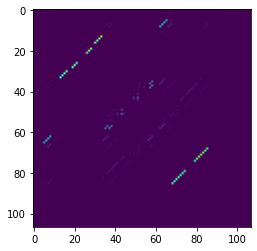

In [8]:
#ViennaRNA Visualization
import RNA
import pkg_resources

experimental = '/Users/devpatelio/Downloads/Coding/Computational_Biology/mRNA-Fold/foldingoptimizer/data/bpps/id_1850700c5.npy'
id = 'id_1850700c5'
idx = train.index[train['id']==id]
# print(train.loc[idx])

exp_sequence = np.load(experimental, allow_pickle=False, encoding='ASCII')
plt.imshow(exp_sequence)

def viennav(train, id, degredation=None, temp=None):

    path = f'/Users/devpatelio/Downloads/Coding/Computational_Biology/mRNA-Fold/foldingoptimizer/data/bpps/{id}.npy'
    idx = train.index[train['id']==id]
    meta_reference = train.loc[idx]
    seq_fold = np.load(path, allow_pickle=False, encoding='ASCII')
    seq_seq = str(meta_reference['sequence'])

    fc = RNA.fold_compound(seq_seq)
    (mfe_struct, mfe) = fc.mfe()
    fc.exp_params_rescale(mfe)
    (pp, pf) = fc.pf()
    (centroid_struct, dist) = fc.centroid()
    centroid_en = fc.eval_structure(centroid_struct)
    (MEA_struct, MEA) = fc.MEA()
    MEA_en = fc.eval_structure(MEA_struct)

    print("%s\n%s (%6.2f)" % (seq_seq, mfe_struct, mfe))
    print("%s [%6.2f]" % (pp, pf))
    print("%s {%6.2f d=%.2f}" % (centroid_struct, centroid_en, dist))
    print("%s {%6.2f MEA=%.2f}" % (MEA_struct, MEA_en, MEA))
    print(" frequency of mfe structure in ensemble %g; ensemble diversity %-6.2f" % (fc.pr_structure(mfe_struct), fc.mean_bp_distance()))

viennav(train, id=id)

In [51]:

##Second order of business, explore code on this dataset and see several approaches
##Third order of business, explore the graph neural network embedding approach for basic value prediction 
##Fourth order of business, reinforcement learning course and where Graph-CNNs fall into the mix

